# Matteo Zortea, Alessandro Rizzi  
## Brain Inspired Computing, Sheet 2  
## Group G3A8
## Exercises solved  
Ex 1: a) b)
Ex 2:
Ex 3:
Ex 4:

# Exercise 1
## a)
At time $t$ the probability of a channel beeing open is $x(t)$, hence the number of expected open channels at time $t$ is $s(t) = Nx(t)$, where $N$ is the total number of channels.  
At time $t + \Delta t$, some channels switch from opened to closed and vice-versa. This happen with the transition rates $$r_{cl \to op} = \alpha_x(u) \\ r_{op \to cl} = \beta_x(u)$$ so that the expected number of transitions from closed to opened and from opened to closed at time $t$ in a time intervals $\delta T$ are respectively $$N_{cl \to op} = (N-s(t)) \,\alpha(u) \, \Delta t = N(1-x(t)) \, \alpha(u) \, \Delta t \\ N_{op \to cl} = s(t) \, \beta(u) \, \Delta t = Nx(t) \, \beta(u) \, \Delta t$$
This means that $$s(t + \Delta t) = s(t) + N_{cl \to op} - N_{op \to cl} = s(t) + \left[ N(1-x(t)) \, \alpha(u) - Nx(t) \, \beta(u) \right] \Delta t$$
so that $$\frac{s(t+\Delta t)-s(t)}{\Delta t} = N \left[(1-x(t)) \, \alpha(u) - x(t) \, \beta(u) \right] $$
Taking the limit $\Delta t \to 0$, remembering that $s(t) = N \, x(t)$ one gets the equation for the evolution of the p.d.f. $$\frac{dx(t)}{dt} = (1-x(t)) \, \alpha(u) - x(t) \, \beta(u) = \alpha(u) - x(t) \, \left(\alpha(u) + \beta(u) \right)$$
or in short form $$\dot x = \alpha - x \left(\alpha + \beta\right) $$
## b) 
One can simply take apart $\alpha + \beta$ from the last expression
$$ \dot x = (\alpha + \beta) \left(\frac{\alpha}{\alpha + \beta} - x\right) \equiv \frac{1}{\tau} \left( x_0 - x \right)$$
so that the required transformations are $\tau = \frac{1}{\alpha + \beta}$ and $x_0 = \frac{\alpha}{\alpha + \beta}$
## c)


## Exercise 2


Definition of various parameters and importation of libraries

In [95]:
import numpy as np 
from matplotlib import pyplot as plt

# Parameters
dt = 0.01 # ms
T_run = 80 # ms
n0 = 0.3
m0 = 0.1
h0 = 0.6
u0 = 0 # V

# Resting potentials
E_Na = 115 # V
E_K = -12 # V
E_l = -10.6 # V
# Conductances
g_Na = 120 # S
g_K = 36 # S
g_l = 0.3 # S

Cm = 1 # F

npoints = int(T_run/dt)

It is convenient to define a function which calculates the Taylor's polynomial of the function $$f(x) = \exp(\alpha x + \beta) - 1$$ around the point $x_0 = -\beta/\alpha$. 
This will be used in the calculation of the transition coefficients when the argument of the eponential is small. Otherwise the function explodes.

In [96]:
# Remember to vectorise it !!!!!!!!!!!!
def taylor_exp(x, alpha, beta, n):
    flag = False
    if isinstance(x, (int, float)):
        x = [x]
        flag = True
    vals = []
    powers = np.arange(1, n+1, 1)
    for xx in x:
        terms = []
        for p in range(1, n):
            terms.append((alpha*xx+beta)**p / np.math.factorial(p))
        vals.append(sum(terms))
    if flag:
        return vals[0]
    else:
        return vals

We then define the functions that calculate the transition rates, using the Taylor expansion when the argument of the exponential is lower than a treshold value. The plots follow.

In [97]:
# Transition rates
'''def cl_to_op(u_arr):
    u_arr = u_arr*1e3 # from V to mV
    if isinstance(u_arr, (int, float)):
        u_arr = [u_arr]
    ret_arr = np.zeros((3, len(u_arr)))
    for i,u in enumerate(u_arr):
        if abs(-0.1*u-5.5) < 1:
            ret_arr[0,i] = (-0.55-0.01*u)/taylor_exp(u, alpha=-0.1, beta=-5.5, n=10)
        else:
            ret_arr[0,i] = (-0.55-0.01*u)/(np.exp(-5.5-0.1*u) - 1)
        if abs(-0.1*u-4) < 1:
            ret_arr[1,i] = (-4-0.1*u)/taylor_exp(u, alpha=-0.1, beta=-4, n=10)
        else:
            ret_arr[1,i] = (-4-0.1*u)/(np.exp(-4-0.1*u) - 1)
        ret_arr[2,i] = 0.007*np.exp(-(u+65)/20)
    return ret_arr

op_to_cl = lambda u: np.array([0.125*np.exp(-(u+65)/80), 4.0*np.exp(-(u+65)/18), 1/(np.exp(-3.5-0.1*u) + 1)])


# x0, tau
get_x0 = lambda u: cl_to_op(u)/(cl_to_op(u)+op_to_cl(u))
get_tau = lambda u: 1/(cl_to_op(u) + op_to_cl(u))'''


'def cl_to_op(u_arr):\n    u_arr = u_arr*1e3 # from V to mV\n    if isinstance(u_arr, (int, float)):\n        u_arr = [u_arr]\n    ret_arr = np.zeros((3, len(u_arr)))\n    for i,u in enumerate(u_arr):\n        if abs(-0.1*u-5.5) < 1:\n            ret_arr[0,i] = (-0.55-0.01*u)/taylor_exp(u, alpha=-0.1, beta=-5.5, n=10)\n        else:\n            ret_arr[0,i] = (-0.55-0.01*u)/(np.exp(-5.5-0.1*u) - 1)\n        if abs(-0.1*u-4) < 1:\n            ret_arr[1,i] = (-4-0.1*u)/taylor_exp(u, alpha=-0.1, beta=-4, n=10)\n        else:\n            ret_arr[1,i] = (-4-0.1*u)/(np.exp(-4-0.1*u) - 1)\n        ret_arr[2,i] = 0.007*np.exp(-(u+65)/20)\n    return ret_arr\n\nop_to_cl = lambda u: np.array([0.125*np.exp(-(u+65)/80), 4.0*np.exp(-(u+65)/18), 1/(np.exp(-3.5-0.1*u) + 1)])\n\n\n# x0, tau\nget_x0 = lambda u: cl_to_op(u)/(cl_to_op(u)+op_to_cl(u))\nget_tau = lambda u: 1/(cl_to_op(u) + op_to_cl(u))'

In [98]:
# Transition rates
def cl_to_op(u_arr):
    u_arr = u_arr # from V to mV
    if isinstance(u_arr, (int, float)):
        u_arr = [u_arr]
    ret_arr = np.zeros((3, len(u_arr)))
    for i,u in enumerate(u_arr):
        if abs(1 + 0.1*u) < 1e-1 and False:
            ret_arr[0,i] = 0.01*(10-u)/taylor_exp(u, alpha=-0.1, beta=1, n=10)
        else:
            ret_arr[0,i] = 0.01*(10-u)/(np.exp(1-0.1*u) - 1)
        if abs(2.5 - 0.1*u) < 1e-1 and False:
            ret_arr[1,i] = 0.1*(25 - u)/taylor_exp(u, alpha=-0.1, beta=2.5, n=10)
        else:
            ret_arr[1,i] = 0.1*(25 - u)/(np.exp(2.5 - 0.1*u) - 1)
        ret_arr[2,i] = 0.07*np.exp(-u/20)
    return ret_arr

op_to_cl = lambda u: np.array([0.125*np.exp(-u/80), 4.0*np.exp(-u/18), 1/(np.exp(3-0.1*u) + 1)])


# x0, tau
get_x0 = lambda u: cl_to_op(u)/(cl_to_op(u)+op_to_cl(u))
get_tau = lambda u: 1/(cl_to_op(u) + op_to_cl(u))

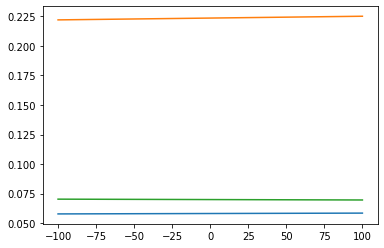

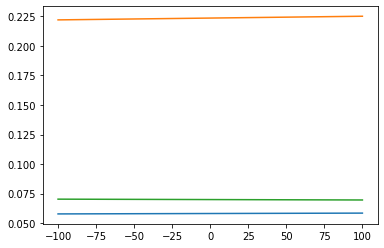

In [99]:
uline = np.linspace(-0.1, 0.1, 10000)
a = cl_to_op(uline)
plt.plot(uline*1e3, a[0,:])
plt.plot(uline*1e3, a[1,:])
plt.plot(uline*1e3, a[2,:])
plt.show()

uline = np.linspace(-0.1, 0.1, 10000)
b = op_to_cl(uline)
plt.plot(uline*1e3, a[0,:])
plt.plot(uline*1e3, a[1,:])
plt.plot(uline*1e3, a[2,:])
plt.show()


Input current function

In [100]:
def I_ext(t):
    I = []
    for tt in t:
        n = int(tt/50e-3)
        if tt > 10 and tt < 60:
            I.append(7.5)
        else:
            I.append(0)
    return I

Right hand sides of the differential equations

In [101]:
def xdot(x, u, n):
    return (1/tau[n]) * (x0[n] - x)
def udot(u, t, n, m, h):
    return (g_l*(E_l - u) + g_Na*m**3*h*(E_Na - u) + g_K*n**4*(E_K - u) + I_ext(t))/Cm

Numerical integration (Euler method)

In [102]:
t = np.zeros((npoints, 1))
x = np.zeros((npoints, 3))
u = np.zeros((npoints, 1))
x_old = np.zeros((3, 1))
xdot_old = np.zeros((3,1))
u_old = 0
udot_old = 0
t[0] = 0
x[0,:] = [n0, m0, h0]
u[0] = u0
for i in range(npoints - 1):
    tau = get_tau(u[i])
    x0 = get_x0(u[i])
    
    for n in range(3):
        #xdot_old[n] = xdot(x[i,n], u[i], n)
        #x_old = x[i] + dt*x[i,n] + dt*xdot_old[n]
        x[i+1,n] = x[i,n] + dt*xdot(x[i,n], u[i], n)
    u[i+1] = u[i] + dt*udot(u[i], t[i], x[i,0], x[i,1], x[i,2])    
    #udot_old = udot(u[i], t[i], x[i,0], x[i,1], x[i,2])
    '''u[i+1] = u[i] + dt*udot(u[i], t[i], x[i,0], x[i,1], x[i,2])
    for n in range(3):
        x[i+1, n] = x_old[n] + 0.5*dt*(xdot_old[n] + xdot(x[i,n], u[i], n)) 
    u[i+1] = u[i] + 0.5*dt*(udot_old + udot(u[i], t[i], x[i,0], x[i,1], x[i,2]))'''
    t[i+1] = t[i] + dt

Plotting the potential and the input current

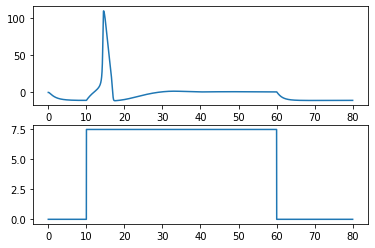

In [103]:
plt.subplot(2,1,1)
plt.plot(t, u)

plt.subplot(2,1,2)
plt.plot(t, I_ext(t))# Parameters


plt.show()



# Exercise 3

## a)
With a constant value of the external current, we can solve the differential equation for the membrane potential $u$:
$$C_m \frac{du}{dt} = g_l(E_l-u)+I_\text{ext}$$
We proceed separing the variables:
$$\frac{du}{u-E_l-I_\text{ext}/g_l} = 
-